In [1]:
import kwant
import numpy as np
import pickle
import matplotlib.pyplot as plt
import ccode.tools as tl
from ccode.finite_system import finite_system
import ccode.plotting as pt

In [2]:
params = tl.junction_parameters(m_nw=np.array([-2, 0, -2]), m_qd=-2, bx=0.011)
a = params['a']

# Triangular trijunction
* Plots of couplings and average couplings for all angles and bands
* Plots of average couplings/10(?) first peaks as a function of band index and angle

## Set up geometries

In [3]:
geometry = {
    "l": 70*a,
    "w": 7*a,
    "a": a,
    "side": 'up',
    "shape": 'triangle',
    "A": 400*a**2
}

In [4]:
n_geometries = 8
tj_angles = np.linspace(0.05, 0.4, n_geometries)*np.pi

In [5]:
tjs = []
for theta in tj_angles:
    geometry.update(angle=theta)
    trijunction, f_params, _ = finite_system(**geometry)
    trijunction = trijunction.finalized()
    tjs.append([trijunction, f_params])

/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.matrices.matrices with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.matrices.matrices
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
/opt/conda/lib/python3.9/site-packages/sympy/__init__.py:672: SymPyDeprecati

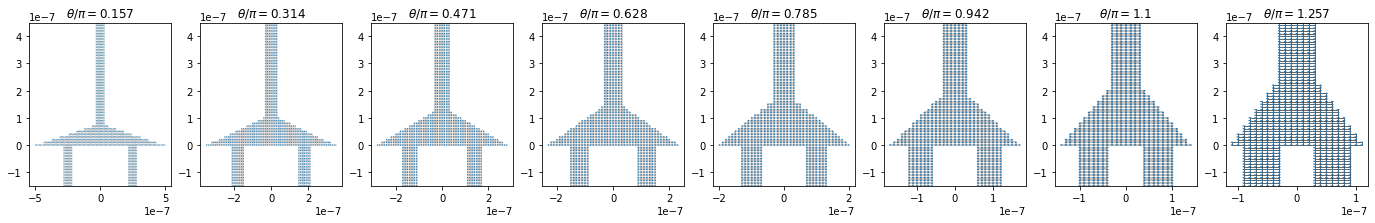

In [6]:
fig, ax = plt.subplots(ncols=n_geometries, nrows=1, figsize=(3*n_geometries, 3))
i = 0
for axes in ax.flatten():
    kwant.plot(tjs[i][0], ax=axes)
    axes.set_ylim(-1.5e-7, 4.5e-7)
    axes.set_title(r'$\theta/\pi=$'+str(np.round(tj_angles[i], 3)))
    #axes.set_xlim(-5e-7, 5e-7)
    #axes.set_title(r'$\theta/\pi$='+str(np.round(angles[i], 3)))
    i += 1

## Analyze results

In [9]:
mus_qd = np.linspace(-0.011, 0.01, 200)
key = 'mu_qd'
n = 6
n_peaks = 10

/home/tinkerer/trijunction-design/analysis/ccode/tools.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(geometry_data)
/home/tinkerer/trijunction-design/analysis/ccode/tools.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(geometry_data)
/home/tinkerer/trijunction-design/analysis/ccode/tools.py:219: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

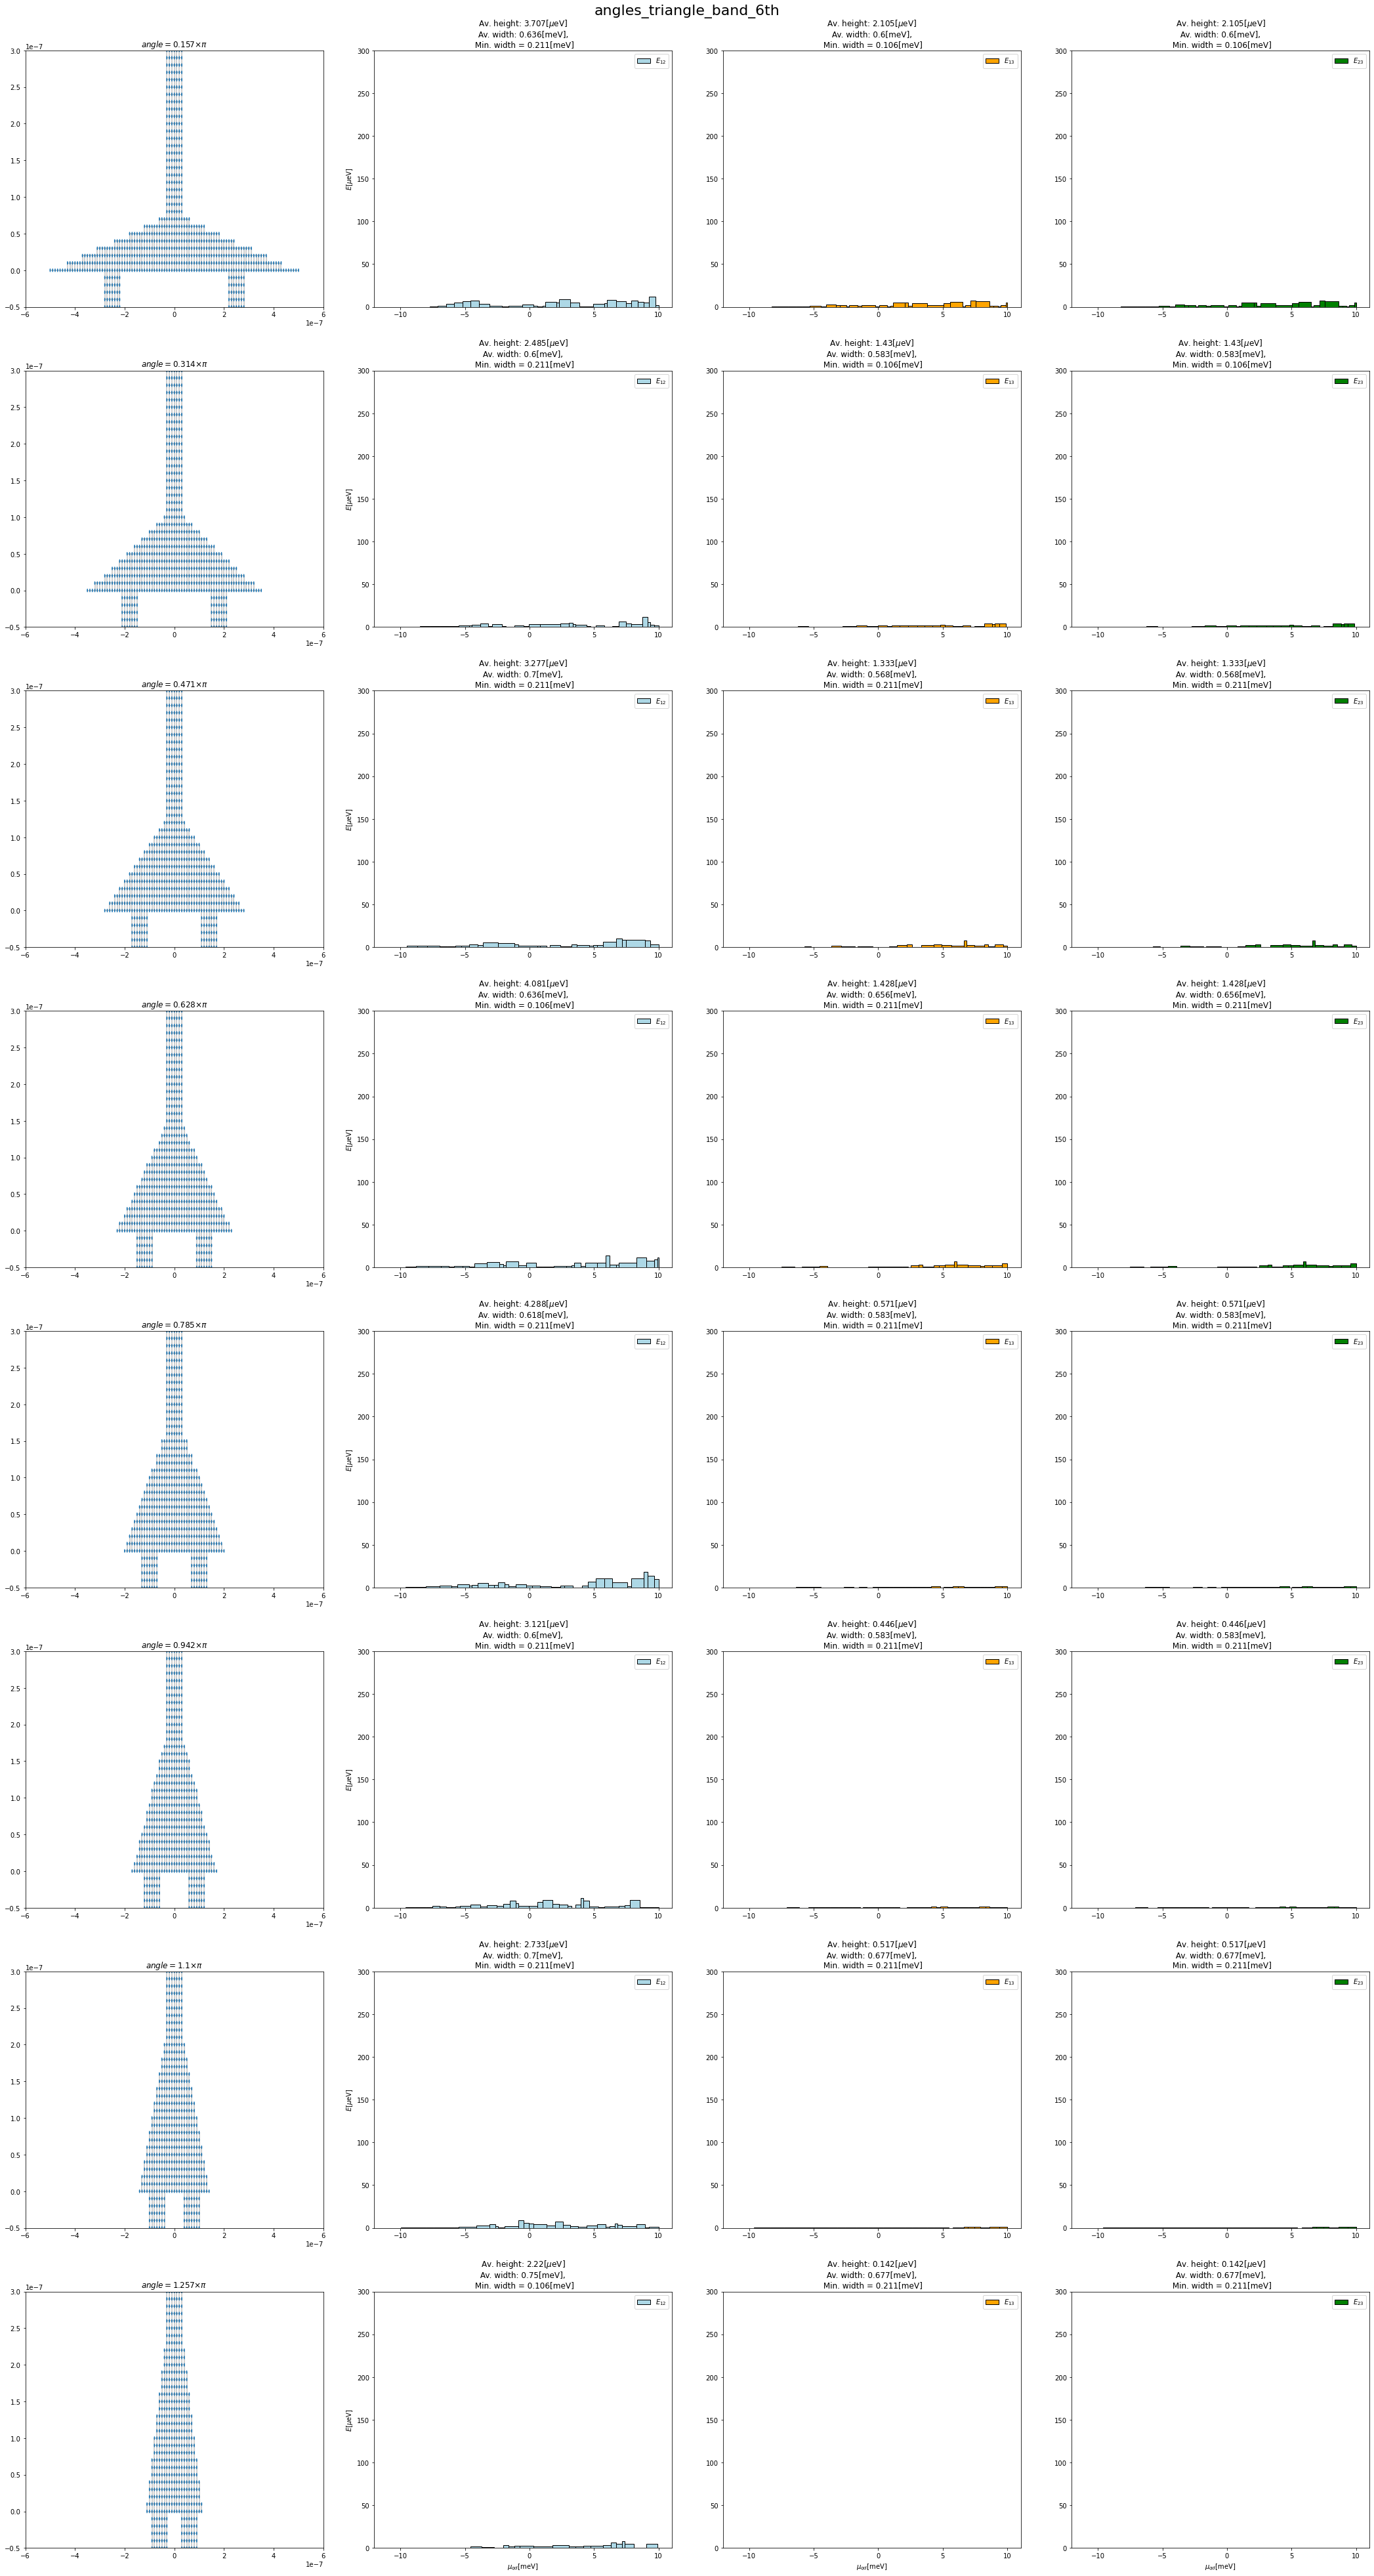

In [14]:
xlims = (-6e-7, 6e-7)
ylims = (-0.5e-7, 3e-7)

subtitles = []
for i in range(n_geometries):
    subtitles.append(r'$angle=$'+str(np.round(tj_angles[i], 3))+r'$\times\pi$')

bands_average_heights = []
bands_average_widhts = []
bands_peaks = []

# analyze data of each band
for index in range(7):
    title = 'angles_triangle_band_'+str(index)+'th'
    # open raw simulation result
    path = '../data/angles_triangle_band_'+str(index)+'th.pickle'
    with open(path, 'rb') as file:
        result = pickle.load(file)
    # arrays used to make plots of all geometries
    average_data = []
    full_data = []
    # arrays used to store information of all geometries
    geometries_peaks = []
    geometries_average_heights = []
    geometries_average_widths = []
    # generate data of all geoemtries from raw simulation result
    data_geometries = tl.separate_data_geometries(data=result, n_geometries=n_geometries)

    # analyze the data of each geometry
    for geometry in data_geometries:

        single_geometry_peaks = []
        single_geometry_average_height = []
        single_geometry_average_width = []

        averages = tl.average_energy_levels(mus=mus_qd, result=geometry)
        average_data.append(averages)
        couplings, _, peaks = tl.coupling_data(data=geometry, n=n, sign=1)
        full_data.append(couplings)
        
        for pair in range(3):
            single_geometry_peaks.append(couplings[pair][peaks[pair][:n_peaks]])
            single_geometry_average_height.append(np.mean(averages[1]))
            single_geometry_average_width.append(np.mean(averages[2]))            
            
        geometries_peaks.append(single_geometry_peaks)
        geometries_average_heights.append(single_geometry_average_height)
        geometries_average_widths.append(single_geometry_average_width)
    
    bands_average_heights.append(geometries_average_heights)
    bands_average_widhts.append(geometries_average_widths)
    bands_peaks.append(geometries_peaks)

    pt.plot_couplings(tjs=tjs,
                      mus=mus_qd,
                      full_data=full_data,
                      title=title,
                      n_geometries=n_geometries,
                      subtitles=subtitles,
                      xlims=xlims,
                      ylims=ylims,
                      ylim=300)
    
    pt.plot_average_couplings(tjs=tjs,
                              average_data=average_data,
                              title=title,
                              n_geometries=n_geometries,
                              subtitles=subtitles,
                              xlims=xlims,
                              ylims=ylims,
                              ylim=300)

In [13]:
peaks

[array([ 23,  29,  35,  41,  48,  54,  62,  75,  77,  85,  95, 104, 110,
        120, 128, 135, 140, 143, 153, 165, 167, 173, 177, 181, 187, 193]),
 array([ 28,  37,  46,  58,  66,  77,  82,  87,  95, 107, 113, 121, 129,
        133, 141, 145, 149, 154, 161, 166, 170, 174, 181, 186, 191, 194]),
 array([ 28,  37,  46,  58,  66,  77,  82,  87,  95, 107, 113, 121, 129,
        133, 141, 145, 149, 154, 161, 166, 170, 174, 181, 186, 191, 194])]

In [56]:
bands_peaks = np.array(bands_peaks)
bands_average_heights = np.array(bands_average_heights)

/tmp/ipykernel_2106/537966564.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bands_average_heights = np.array(bands_average_heights)


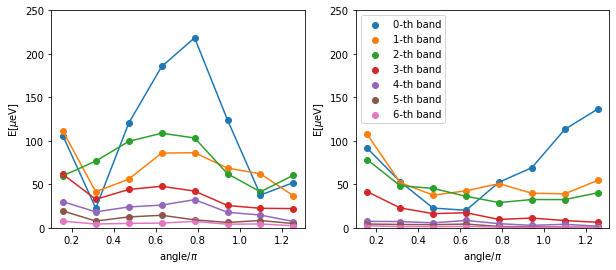

In [61]:
labels = []
for i in range(7):
    labels.append(str(i)+'-th band')
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for n_col in range(2):
    for i in range(7):
        m = 1e6*np.mean(bands_peaks[i, :, n_col], -1)
        ax[n_col].plot(tj_angles, m)
        ax[n_col].scatter(tj_angles, m, label=labels[i])
    ax[n_col].set_xlabel(r'angle/$\pi$')
    ax[n_col].set_ylabel(r'E[$\mu$eV]')
    ax[n_col].set_ylim(0, 250)
    #ax[n_col].set_title(r'Average coupling of first 10 levels vs angle for 0th band')
ax[-1].legend()

Text(0.5, 1.0, 'Average coupling of first 10 levels vs angle for 0th band')

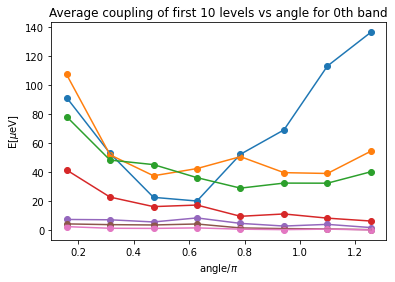

In [45]:
fig, ax = plt.subplots()
for i in range(7):
    m = 1e6*np.mean(bands_peaks[i, :, 1], -1)
    ax.plot(tj_angles, m)
    ax.scatter(tj_angles, m)
ax.set_xlabel(r'angle/$\pi$')
ax.set_ylabel(r'E[$\mu$eV]')
ax.set_title(r'Average coupling of first 10 levels vs angle for 0th band')